<a href="https://colab.research.google.com/github/MeesalaKavya1977/Stock-market-predection-using-LSTM/blob/main/Stock_market_predection_using_LSTM(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,294.643921,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,294.722382,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,288.058350,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,280.042053,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,274.318939,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


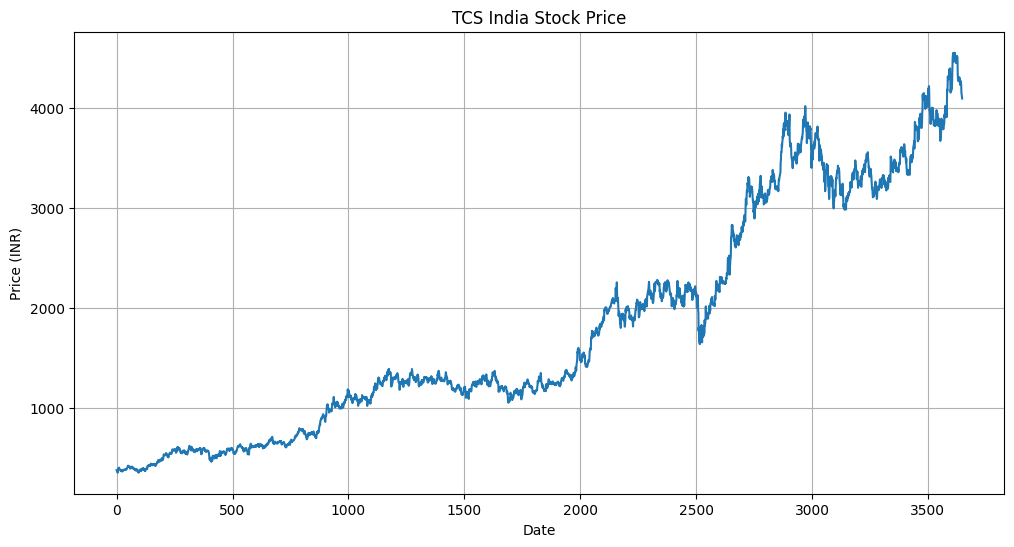

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3644,4253.250000,4293.850098,4198.600098,4227.399902,2378875
3645,4143.000000,4241.950195,4112.450195,4149.200195,5759183
3646,4140.000000,4165.399902,4122.200195,4136.649902,2137590
3647,4131.049805,4169.950195,4095.000000,4116.799805,2759474


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3644,4166.712495
3645,4169.863496
3646,4173.027996
3647,4175.875994


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

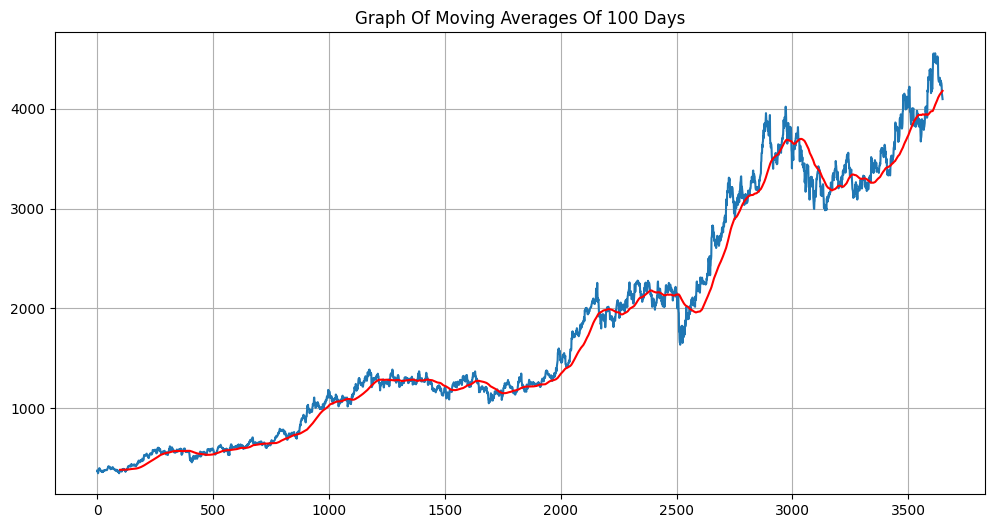

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3644,4050.947751
3645,4052.397753
3646,4054.000002
3647,4055.683751


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

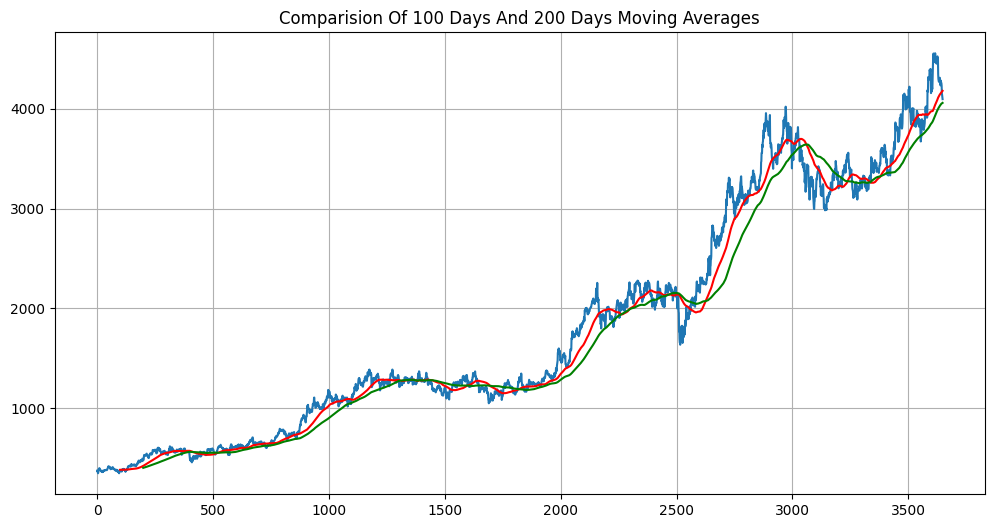

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3649, 5)

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2554, 7)
(1095, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,294.643921,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,294.722382,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,288.058350,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,280.042053,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,274.318939,6048178


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2554,2020-05-19,1903.000000,1966.449951,1903.000000,1948.650024,1829.403076,3198693
2555,2020-05-20,1950.000000,1962.900024,1931.699951,1953.599976,1834.050171,2778505
2556,2020-05-21,1946.000000,1998.000000,1941.150024,1991.199951,1869.349487,3400908
2557,2020-05-22,1977.099976,2032.000000,1961.250000,2020.349976,1896.715332,3663418
2558,2020-05-26,2015.000000,2024.000000,1925.000000,1943.000000,1824.098999,4575317


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.80520441],
       [0.80030343],
       [0.82763495]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2454, 100, 1)

**Model** **LSTM**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - loss: 0.0923 - mean_absolute_error: 0.2171
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - loss: 0.0095 - mean_absolute_error: 0.0685
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - loss: 0.0098 - mean_absolute_error: 0.0693
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - loss: 0.0072 - mean_absolute_error: 0.0598
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0069 - mean_absolute_error: 0.0580
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - loss: 0.0061 - mean_absolute_error: 0.0540
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - loss: 0.0065 - mean_absolute_error: 0.0550
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0066 - mean_absolute_error: 0.0572
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - loss: 0.0055 - mean_absolute_error: 0.0502
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - loss: 0.0046 - mean_absolute_error: 0.0478
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1095, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2229.050049
1,2222.899902
2,2231.699951
3,2215.600098
4,2201.949951


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20316037],
       [0.20105228],
       [0.20406868],
       ...,
       [0.8570302 ],
       [0.85022616],
       [0.84273667]])

In [ ]:
input_data.shape

(1195, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1095, 100, 1)
(1095,)


In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step


In [ ]:
y_pred.shape

(1095, 1)

In [ ]:
y_test

array([0.10704739, 0.10874409, 0.12163227, ..., 0.8570302 , 0.85022616,
       0.84273667])

In [ ]:
y_pred

array([[0.15385613],
       [0.15525588],
       [0.15658888],
       ...,
       [0.7623782 ],
       [0.7527878 ],
       [0.7423222 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00034277])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

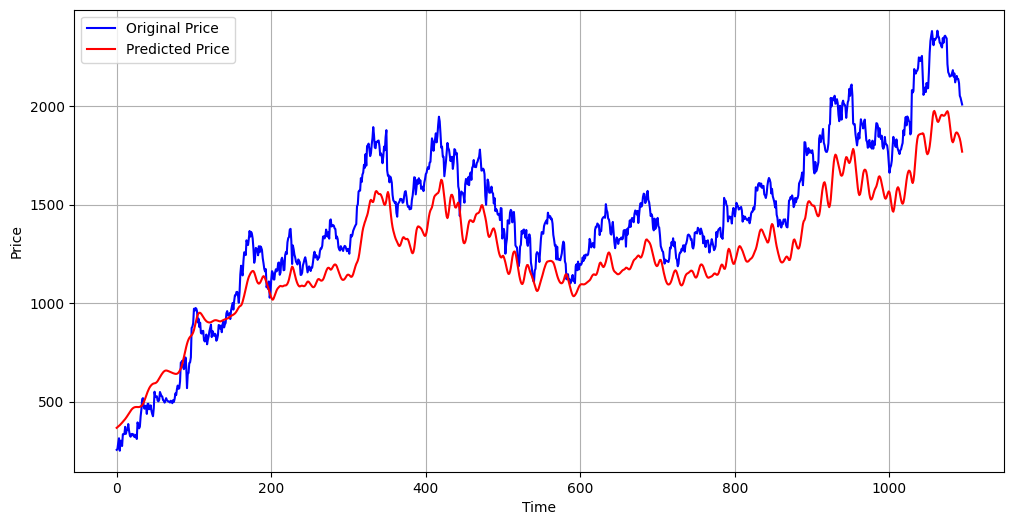

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 13.57%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.7516193984160987


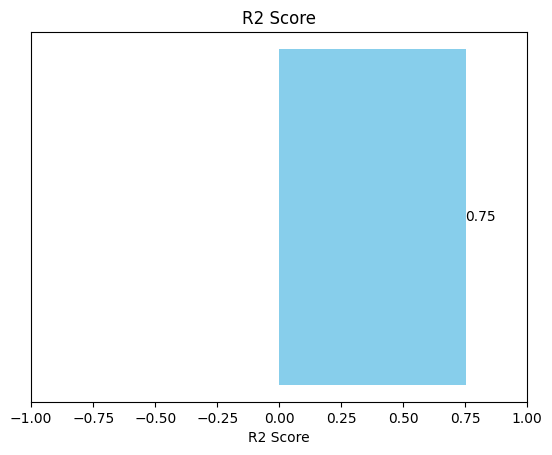

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

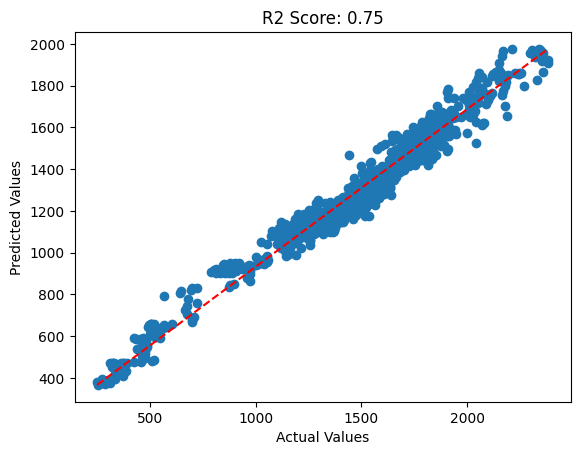

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()